### CDS NYU
### DS-GA 1007 | Programming for Data Science
### Lab 06
### October 9, 2024


# NumPy: Array Manipulation for Scientific Computing

## Section Leaders


Dong Li  --  dl5214@nyu.edu  -- 

Ziyi (Ceci) Chen --  zc1634@nyu.edu  --


## Resources

* Concise textbook introduction to NumPy: ”Python Data Science Handbook” pp. 33-96, by Jake VanderPlas
    * Also accessible online at https://jakevdp.github.io/PythonDataScienceHandbook

* NumPy's freely acccessible, online, high-quality and concise documentation: https://numpy.org/doc/

* Case Study:  https://swcarpentry.github.io/python-novice-inflammation/02-numpy/index.html


## 1. Creation, Manupulation and Indexing of NumPy Arrays
NumPy supports large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions

In [73]:
import numpy as np

### Create NumPy arrays

#### Using `arange` to define numerical entries and (optionally)  `reshape` to define the dimensions

In [74]:
x = np.arange(1, 9, 2) # start value = 1, end value = 9, step = 2 
print(x)

[1 3 5 7]


In [75]:
x = np.arange(20).reshape(5, 4) # (row, col) 5x4 matrix
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


### Array Attributes

In [76]:
print(x.ndim)  # Number of dimensions of the array
print(x.shape) # Tuple of integers indicating the size of the array in each dimension
print(x.size)  # Total number of elements of the array
print(x.dtype) # Type of the elements in the array

2
(5, 4)
20
int64


#### Self-defined NumPy array

In [77]:
# 1 dimension
x = np.array([1, 2, 3, 4])
print(x)
print(x.shape)

[1 2 3 4]
(4,)


In [78]:
# 2 dimensions
x = np.array([[1.5, 2.0, 3.3], [4.7, 5.9, 6.1]])
print(x)
print(x.shape) # row, columns

[[1.5 2.  3.3]
 [4.7 5.9 6.1]]
(2, 3)


#### Using other methods with specific parameters

In [79]:
x = np.linspace(0, 1, 5) # start, stop, num (creates an array of 5 evenly spaced values between 0 and 1 inclusively)
print(x)

[0.   0.25 0.5  0.75 1.  ]


In [80]:
print(np.ones((5, 5)))  # Array filled with ones 

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [81]:
print(np.zeros((2, 2))) # Array filled with zeros [matrix initialization, masking for filtering in neural network]

[[0. 0.]
 [0. 0.]]


In [82]:
print(np.identity(3))   # Identity matrix [Matrix Inversion, Linear Transformations]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Sample array from a uniform Distribution: https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)

In [83]:
x = np.random.rand(3, 2) # Return a sample (or samples) from a uniform distribution (in the range [0,1))
                        # simulations, machine learning models, or random sampling tasks
print(x)

[[0.17894983 0.84833771]
 [0.15794991 0.13063376]
 [0.99306676 0.11275725]]


In [84]:
x = np.random.randint(low = 0, high = 10, size = (3,2)) # Return sample of random integers
print(x)

[[3 9]
 [7 9]
 [9 1]]


Sample array from a Gaussian/Normal Distribution: https://en.wikipedia.org/wiki/Normal_distribution  

In [85]:
x = np.random.randn(3, 2) # Return a sample (or samples) from the “standard normal” distribution - N(0,1)
print(x)

[[ 0.25914776  2.19819106]
 [-0.42933418  0.36306844]
 [-0.72260436 -0.03823991]]


#### Loading data stored on file into a NumPy array

In [86]:
# Create two NumPy array by loading data in two seprate files (used for Exercise 2 below)
a = np.loadtxt(fname='ClassA.csv', delimiter=',')
b = np.loadtxt(fname='ClassB.csv', delimiter=',')

In [87]:
print(a)

[[93. 79. 60. 85. 82.]
 [88. 92. 93. 98. 61.]
 [91. 69. 60. 79. 74.]
 [95. 98. 91. 86. 74.]
 [78. 79. 61. 68. 87.]
 [76. 81. 96. 72. 74.]
 [77. 70. 79. 82. 90.]
 [84. 94. 90. 68. 88.]
 [63. 72. 78. 75. 92.]
 [85. 74. 61. 75. 98.]]


### Select sub-arrays by slicing an array

Syntax:
1) array[start:stop:step] for 1D arrays.
2) array[start_row:stop_row:step_row, start_col:stop_col:step_col] for multi-dimensional arrays


In [88]:
x = np.random.randn(5, 4)
print(x)

[[-1.85463169  1.44600322 -1.40845577  0.07035357]
 [ 1.04406589 -1.26996501  0.90238789 -1.2804992 ]
 [ 0.28390614 -0.92617728  1.05678078  2.57642037]
 [ 1.45852444  0.11046342 -0.46953431  0.23933555]
 [-0.7111689  -0.85872642  0.66339452  0.40937133]]


In [89]:
print(x[1, :])  # extracts all columns in second row (index 1) 

[ 1.04406589 -1.26996501  0.90238789 -1.2804992 ]


In [90]:
print(x[:, 1])  # extracts all rows in second column (index 1) 

[ 1.44600322 -1.26996501 -0.92617728  0.11046342 -0.85872642]


In [91]:
print(x[:, -1]) # extracts all rows in last column (index -1) 

[ 0.07035357 -1.2804992   2.57642037  0.23933555  0.40937133]


In [92]:
print(x[:3, 1:]) # extracts the first 3 rows (rows 0 to 2) and all columns starting from the second one (index 1 to the end)

[[ 1.44600322 -1.40845577  0.07035357]
 [-1.26996501  0.90238789 -1.2804992 ]
 [-0.92617728  1.05678078  2.57642037]]


### Select sub-arrays using a Boolean mask

In [93]:
x = np.array([[1, 2, 4], [0, 5, 9]])
print(x)

mask = (x <= 4) # creates a boolean array where values less than or equal to 4 are marked as True
print(mask)

[[1 2 4]
 [0 5 9]]
[[ True  True  True]
 [ True False False]]


In [94]:
x[mask] = -1  # replaces elements in x that correspond to True with -1
print(x)

[[-1 -1 -1]
 [-1  5  9]]


### Change the shape of an array 

In [95]:
#ravel function flattens the array
print(x.ravel())
print(x.ravel().shape)

[-1 -1 -1 -1  5  9]
(6,)


In [96]:
# Reshape in a self-defined way
y = x.reshape((2, 3))
print(y)
print(y.shape)

[[-1 -1 -1]
 [-1  5  9]]
(2, 3)


### Stack arrays
Pay attention to array dimension!

In [97]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [98]:
y = np.array([7,8,9])
print(y)

[7 8 9]


In [99]:
np.vstack([x, y]) # vertically stacking x and y (have to be the same columns)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [100]:
# Should report error
np.hstack([x, y])  # horizontally stacking x and y (have to be the same rows)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [102]:
z = np.array([[1], [2]]) # 2 x 1 matirx
print(z)
np.hstack([x, z])

[[1]
 [2]]


array([[1, 2, 3, 1],
       [4, 5, 6, 2]])

### Exercise 1
1. Create an array $X$ with 5 rows and 6 colunms where the elements start from 1 to 30 
2. Use slicing to select:  
   a. Subarray containing only the odd rows from $X$  
   b. Subarray containing only the odd rows and even columns from $X$
3. Replace all the elements that is a multiple of 5 in $X$ by 0

## 2. Statistical Analysis of Data
### Get summary statistics of arrays: min, max, mean, median, std, sum

In [36]:
X = np.arange(1,31).reshape(5, 6)
print(X)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]


### Example of the median

Definition: The median of a distribution of numbers is the "middle" number, that is the one such that, if the numbers were sorted, there would be as many numbers on its left as there would be on its rights: https://en.wikipedia.org/wiki/Median

In [37]:
# Along row
np.median(X, axis=1)

array([ 3.5,  9.5, 15.5, 21.5, 27.5])

In [38]:
# Along column
np.median(X, axis=0)

array([13., 14., 15., 16., 17., 18.])

In [39]:
# All elements
np.median(X)

15.5

### Other statistics such as mean, std, min, max, etc (seen during the lecture)
Try for yourself to compute some statistics on different arrays of 1 or 2 dimensions

In [40]:
# Examples
m = np.mean(X, axis=0)
s = np.std(X, axis=0)
h = np.min(X, axis=1)
l = np.max(X, axis=1)
m_total = np.mean(X)
print('Overall average:', m_total)


Overall average: 15.5


### Writing your custom statistical functions
Try writing functions to perform statistical operations

In [41]:
# Function which takes an array as input, and return the vector of averages for each row 
def stat_avg1(a):
    return np.mean(a, axis=1)

In [47]:
# Function which takes an array as input, and return two vector (averages for each row, averages for each column)
def stat_avg2(a):
    return np.mean(a, axis=1), np.mean(a, axis=0)

In [48]:
# Function to return the maximum across averages for each row
def stat_avgmax(a):
    v = np.mean(a, axis=1)
    return np.max(v)

Apply these functions to an array of shape ``(10,10)`` where each entry is drawn from a normal (Gaussian) distribution with mean 0 and standard deviation 1

In [68]:
a = np.random.randn(10, 10)

In [70]:
stat_avg1(a)

array([ 0.21684384,  0.37202507,  0.61702407,  0.0479685 , -0.11083925,
       -0.27690376,  0.03691222,  0.11333812,  0.66769599,  0.37600477])

In [71]:
stat_avg2(a)

(array([ 0.21684384,  0.37202507,  0.61702407,  0.0479685 , -0.11083925,
        -0.27690376,  0.03691222,  0.11333812,  0.66769599,  0.37600477]),
 array([-0.19168154, -0.01183829,  0.19450032,  0.97125989,  0.56073268,
         0.19369903, -0.30448733,  0.08901275,  0.68085091, -0.12197882]))

In [72]:
stat_avgmax(a)

0.6676959930015812

### Exercise 2

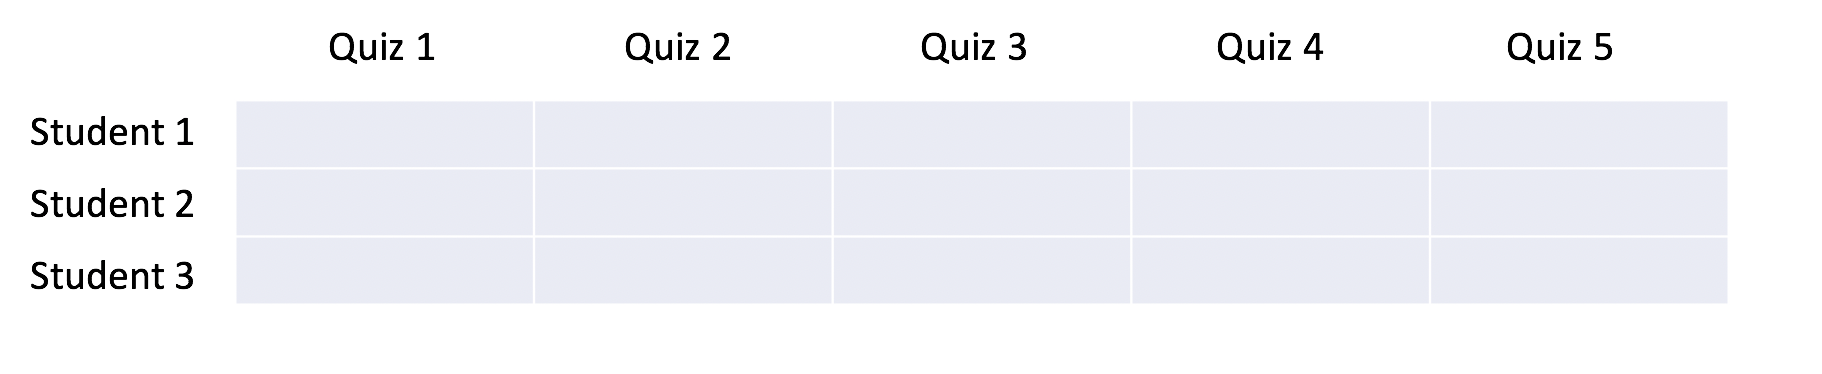

In [51]:
from IPython.display import Image
Image(filename="lab07_data.png")

The files `ClassA.csv` and `ClassB.csv` contain results for 10 students each. Each student took 5 Quizes in total. Load the data from these files and:
1. Stack ClassA and ClassB vertically. Now we have 20 students in total.
2. What are the maximum scores for each Quiz among the 20 students?
3. What is the lowest score that each student got among the 5 Quizes?
4. What is the average score that each student got for the 5 Quizes?
5. In terms of total scores of 5 Quizes, which class performed better?

## 3. Broadcasting and Mathematical Operations
https://numpy.org/doc/stable/user/basics.broadcasting.html

### Examples of arithmetic operations

In [56]:
a = np.arange(0,9)

In [53]:
a + a  # Addition

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [54]:
a * a  # Multiplication (element-wise)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [ ]:
a**2 # Squaring (element-wise)

In [ ]:
np.sqrt(a) # Square Root

In [ ]:
np.exp(a) # exponential (e^x) of each element in the array

### Examples of broadcasting

In [58]:
# 1. Scalar broadcasting
# Assign the value 100 to the first five elements of array 'a'
a[0:5] = 100
print("\na[0:5] = 100 (Scalar broadcasting):")
print(a)

# 2. Scalar broadcasting 
# Add 10 to each element of 'a'
result_add_10 = a + 10
print("\na + 10 (Scalar broadcasting):")
print(result_add_10)

# Multiply each element of 'a' by 10
result_multiply_10 = 10 * a
print("\n10 * a (Scalar broadcasting):")
print(result_multiply_10)

# 3. Array broadcasting 
# Add a (1,9) array to a (2,9) array using broadcasting
ones_array = np.ones((2, 9))
broadcasted_add = ones_array + np.arange(9) #  NumPy automatically broadcasts the smaller array of the larger one, performing element-wise addition.
print("\nnp.ones((2,9)) + np.arange(9) (Array broadcasting):")
print(broadcasted_add)


a[0:5] = 100 (Scalar broadcasting):
[100 100 100 100 100   5   6   7   8]

a + 10 (Scalar broadcasting):
[110 110 110 110 110  15  16  17  18]

10 * a (Scalar broadcasting):
[1000 1000 1000 1000 1000   50   60   70   80]

np.ones((2,9)) + np.arange(9) (Array broadcasting):
[[1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 2. 3. 4. 5. 6. 7. 8. 9.]]


In [60]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
print(a)
print(b)
print(a+b)

[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
[1. 2. 3.]
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


### Examples of linear algebra operations
Numpy also offers Linear Algebra operators to manipulate arrays as vectors or matrices

In [61]:
a = np.array([[1,2], [3,4]], float)
b = np.array([[2,0], [1,3]], float)
print(a)
print(b)

[[1. 2.]
 [3. 4.]]
[[2. 0.]
 [1. 3.]]


#### Vector dot product

In [62]:
np.dot(a[:,0], a[:,1]) # Vector dot product between first and second columns of matrix a

14.0

#### Matrix multiplication

In [ ]:
np.matmul(a, b) # Matrix product between matrices a and b (number of columns of a needs be the same as number of rows of b)
a @ b           # Shortcut @ operator: Same as np.matmul(), but faster to type


#### Matrix determinant, norm, inverse, trace, and many others

In [63]:
np.linalg.det(a+b) # Determinant of (a + b)

13.0

In [64]:
np.linalg.norm(a) - np.linalg.norm(b) # Norm of the difference between matrices a and b

1.7355681882777199

### Exercise 3

For arrays `A`, `B`, `C` and `D` given below:

1. What is the element-wise product of A and B?
1. What is the matrix product of A and B?
3. Why can you compute the element-wise product of B and C even though they have different shape? 
4. Can you compute the matrix product of B and D? Why?
5. Can you compute the matrix product of D and B? Why?

In [103]:
import numpy as np

A = 2*np.identity(3)
B = np.arange(1, 10).reshape(3,3)
C = np.array([1,2,3])
D = np.arange(0, 12).reshape(3,4)

### [Optional] For more details on the difference between `np.matmul` and `np.dot`:
https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot
https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul

Short version: For most needs, they are identical when applied on two matrices :)

## **Thank you everyone!**